In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# Defining the column names
columns = [
    "duration", "protocol_type", "service", "flag", "src_bytes",
    "dst_bytes", "land", "wrong_fragment", "urgent", "hot", "num_failed_logins",
    "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root",
    "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds",
    "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate",
    "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate",
    "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
    "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
    "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label", "difficulty_level"
]

# Load the dataset
file_path = '/Users/maryam/ML-IDS/archive/KDDTrain+.txt'
data = pd.read_csv(file_path, header=None, names=columns)

# Encoding categorical features
categorical_features = ['protocol_type', 'service', 'flag']
numeric_features = data.columns.drop(categorical_features + ['label', 'difficulty_level'])

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Split data into features and labels
X = data.drop(['label', 'difficulty_level'], axis=1)
y = data['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Classifier
clf = RandomForestClassifier()

# Create a preprocessing and training pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', clf)
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test set
predictions = pipeline.predict(X_test)

# Evaluate the model
report = classification_report(y_test, predictions)

print(report)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 precision    recall  f1-score   support

           back       1.00      1.00      1.00       185
buffer_overflow       1.00      0.33      0.50         9
   guess_passwd       1.00      0.91      0.95        11
           imap       1.00      1.00      1.00         1
        ipsweep       0.99      0.99      0.99       733
           land       0.00      0.00      0.00         3
       multihop       0.00      0.00      0.00         0
        neptune       1.00      1.00      1.00      8228
           nmap       0.98      0.99      0.99       313
         normal       1.00      1.00      1.00     13422
           perl       0.00      0.00      0.00         1
            phf       1.00      1.00      1.00         1
            pod       1.00      0.93      0.96        43
      portsweep       1.00      1.00      1.00       573
        rootkit       0.00      0.00      0.00         1
          satan       1.00      0.99      0.99       738
          smurf       1.00    

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn

Training Metrics:
Accuracy: 0.9999
Precision: 0.9999
Recall: 0.9999
F1 Score: 0.9999


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Testing Metrics:
Accuracy: 0.9981
Precision: 0.9980
Recall: 0.9981
F1 Score: 0.9980


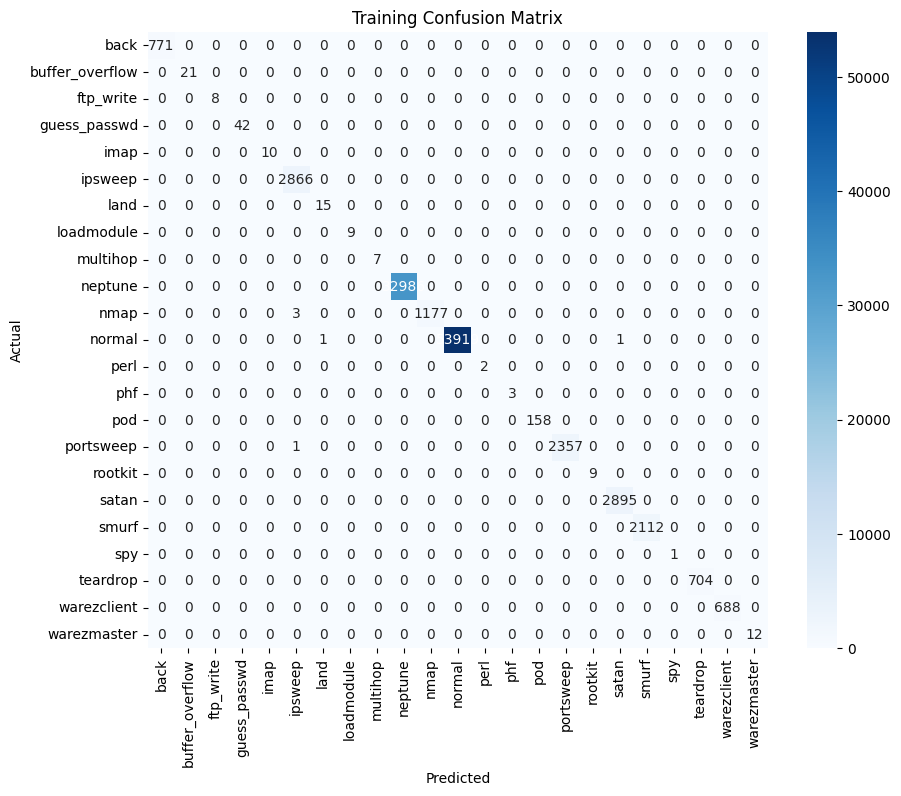

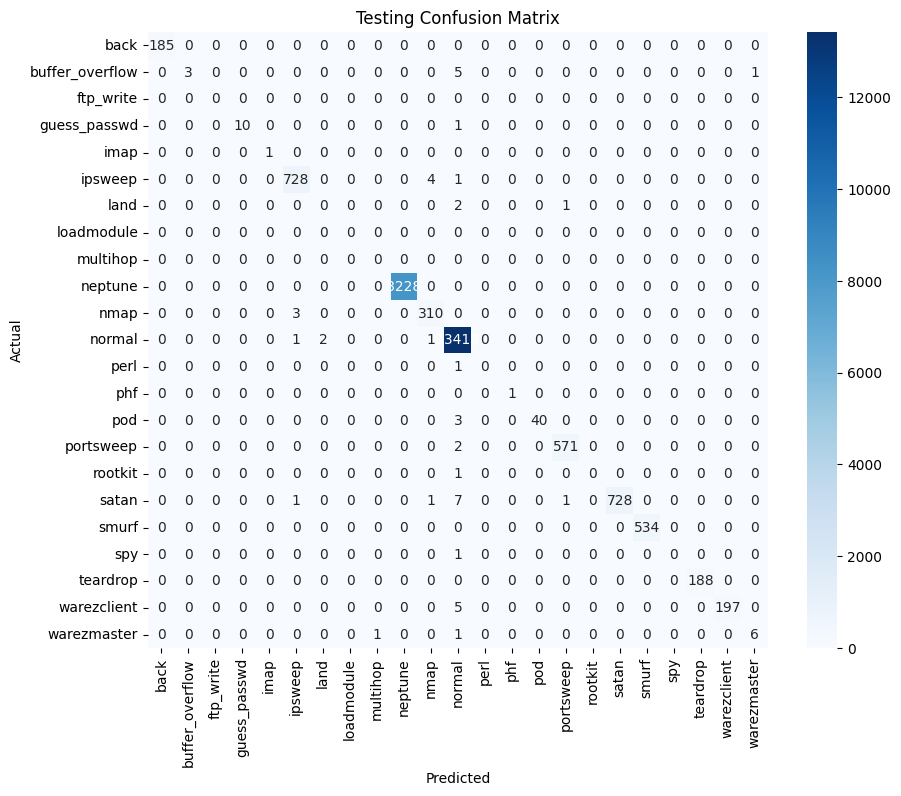

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

# Function to calculate and print metrics
def print_metrics(y_true, y_pred, dataset_type="Training"):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"{dataset_type} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

# Training metrics
train_predictions = pipeline.predict(X_train)
print_metrics(y_train, train_predictions, "Training")

# Testing metrics
test_predictions = pipeline.predict(X_test)
print_metrics(y_test, test_predictions, "Testing")

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, dataset_type="Training"):
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_true, y_pred, labels=pipeline.classes_)
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
    plt.title(f"{dataset_type} Confusion Matrix")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Plot confusion matrix for training and testing data
plot_confusion_matrix(y_train, train_predictions, "Training")
plot_confusion_matrix(y_test, test_predictions, "Testing")

